In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import cross_val_score

import multiprocessing
import operator
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import warnings

data = pd.read_csv('AirBNB.csv')
df = pd.DataFrame(data)

display(df.head(5))
display(df.info())

/Users/djmore/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/djmore/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

None

In [2]:
# just drop rows with bad/weird values
# (we could do more here)
for col in df:
    if(df[col].isnull().any()):
        print(col)
        

#Fill all columns that have null values to 0        
df=df.fillna(0)

#df = df[df.bedrooms != 0]
#df = df[df.beds != 0]
#df = df.dropna(axis=0)

for column in df.columns:
   if df[column].dtype == object:
        label = LabelEncoder()
        label.fit(list(df[column].values))
        df[column] = label.transform(list(df[column].values))

bathrooms
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
last_review
neighbourhood
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


In [6]:
display(df.head(5))
display(df.info())

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,0,0,6142,3,1.0,4,2,True,4,...,40.696524,-73.991617,10464,78,2,100.0,32399,196,1.0,1.0
1,6304928,0,0,6269,7,1.0,4,2,True,4,...,40.766115,-73.989040,65672,253,6,93.0,16221,75,3.0,3.0
2,7919400,0,0,21345,5,1.0,4,1,True,4,...,40.808110,-73.943756,66396,248,10,92.0,32853,85,1.0,3.0
3,13418779,17,0,38854,4,1.0,4,0,True,5,...,37.772004,-122.431619,9387,326,0,0.0,33693,749,2.0,2.0
4,3808709,0,0,55413,2,1.0,4,1,True,2,...,38.925627,-77.034596,32068,120,4,40.0,0,342,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 28 columns):
id                        74111 non-null int64
property_type             74111 non-null int64
room_type                 74111 non-null int64
amenities                 74111 non-null int64
accommodates              74111 non-null int64
bathrooms                 74111 non-null float64
bed_type                  74111 non-null int64
cancellation_policy       74111 non-null int64
cleaning_fee              74111 non-null bool
city                      74111 non-null int64
description               74111 non-null int64
first_review              74111 non-null int64
host_has_profile_pic      74111 non-null int64
host_identity_verified    74111 non-null int64
host_response_rate        74111 non-null int64
host_since                74111 non-null int64
instant_bookable          74111 non-null int64
last_review               74111 non-null int64
latitude                  74111 non-null flo

None

In [5]:
y = df['log_price']
df.drop('log_price',inplace=True,axis=1)

In [8]:
#Benchmark score using linear regression
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, df, y, cv=10, scoring='neg_mean_absolute_error')
benchMarkScore=scores.mean()
print("LinearRegression Accuracy : {0:.5f}".format(benchMarkScore))

LinearRegression Accuracy : -0.35789


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


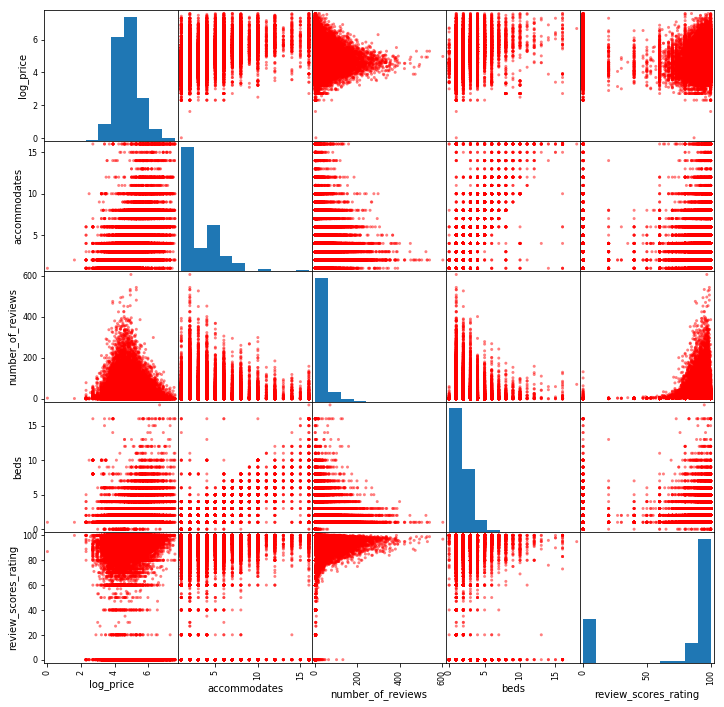

In [17]:
scattercols = ['log_price','accommodates', 'number_of_reviews', 'beds','review_scores_rating']
ax = pd.scatter_matrix(df[scattercols],figsize=(12, 12), c='red')

In [18]:
#split the dataset into target and training labels
logPrice_raw = df['log_price']
df = df.drop('log_price', axis = 1)


#Looking at the data I do not think any of the features are skewed, but confirm later    

In [19]:
#Find a way to hot encode the cells
categorical=['property_type','room_type','bed_type','cancellation_policy', 'zipcode']
df=pd.get_dummies(df, columns=categorical)
df.head(5)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 841 entries, id to zipcode_769
dtypes: bool(1), float64(6), int64(16), uint8(818)
memory usage: 70.3 MB


NameError: name 'cross_val_score' is not defined

In [ ]:
#Split and shuffle data
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    #learner.fit(X_train.head(sample_size), y_train.head(sample_size))
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = AdaBoostClassifier(random_state=0)
clf_C = DecisionTreeClassifier(criterion="entropy",random_state=0)






samples_1 = int(X_train.shape[0] * 0.01)
samples_10 = int(X_train.shape[0] * 0.1)
samples_100 = int(X_train.shape[0])

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)